Name: Chanyu Choung

Class: CMP414

Homework due date: Apr 26th, 2021 (Monday)

# Week 11 Homework
In this assignment, we will analyze the Titanic dataset with the Decision Tree model and the Random Forest model.

On April 15, 1912, during her maiden voyage, the widely considered unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

1. Load the data using the code given below. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
titanic_url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"
titanic = pd.read_csv(titanic_url).drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1).dropna()
titanic['Sex'] = titanic['Sex'].apply(lambda x: int(x == 'male'))
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


The features are:
- Survived: whether the passenger survived. This is the target feature.
- Pclass: the ticket class
- Sex: 0 means female, 1 means male.
- Age
- SibSp: number of siblings / spouses aboard the Titanic
- Parch: number of parents / children aboard the Titanic
- Fare

2. Split the data into training set (80%) and test set (20%)
3. Build a decision tree model on the training set for max_depth = 2, 3, 4. Use the test set to determine which model has the best performance.
4. Use `plot_tree` function from `sklearn` to visualize the best decision tree model. Describe one group of passengers are likely to survive. If the generated graph is too small, you can add the statement `plt.figure(figsize=(12,12))` **before** the `plot_tree` statement to make the graph larger.
5. Build a random forest model with the same `max_depth` value and `n_estimators=100`. Show the accuracy score on the test set.

In [ ]:
X = titanic.loc[:, ["Pclass","Sex","Age","SibSp","Parch","Fare"]]
X2 = titanic.loc[:, ["Sex","Age","SibSp","Parch"]]
y = titanic['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.2)
y_test = y_test.copy()

Depth 2 Tree Accuracy: 0.7412587412587412


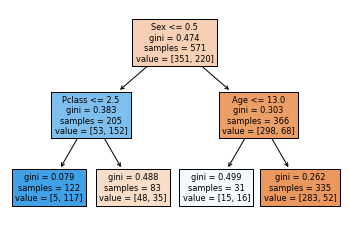

Depth 3 Tree Accuracy: 0.7972027972027972


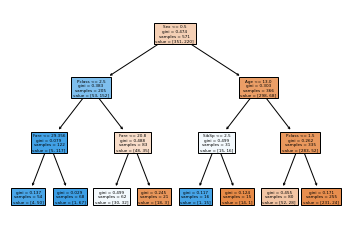

Depth 4 Tree Accuracy: 0.7692307692307693


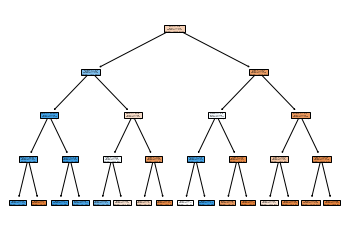

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

def get_Tree(n):
  tree_clf = DecisionTreeClassifier(max_depth=n, random_state=42)
  tree_clf.fit(X_train, y_train)
  predict = tree_clf.predict(X_test)
  print("Depth",n,"Tree Accuracy:", accuracy_score(y_test, predict))

  plot_tree(tree_clf, feature_names=X.columns, filled=True)
  plt.show()

  return predict

Tree2, Tree3, Tree4 = get_Tree(2), get_Tree(3), get_Tree(4)

Best performance: decision tree with 3 max-depth has the highest average accuracy rate out of the three models we've trained.

One likely survival group: Male, PClass under 2.5, Age over 27.5, Fare is less than 24.9.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def get_rf(n):
  rf_clf = RandomForestClassifier(
      n_estimators=100,
      max_depth=n,
      n_jobs=-1
  )
  rf_clf.fit(X2_train, y_train)
  predict = rf_clf.predict(X2_test)
  print("Depth",n,"Random Forest Accuracy:", accuracy_score(y_test, predict))

  return predict

RF2, RF3, RF4 = get_rf(2), get_rf(3), get_rf(4)

Depth 2 Random Forest Accuracy: 0.7552447552447552
Depth 3 Random Forest Accuracy: 0.7762237762237763
Depth 4 Random Forest Accuracy: 0.7832167832167832
